**DATA ANALYSIS PYTHON PROJECT:BLINKIT ANALYSIS**


**####importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**import data**

In [12]:
df=pd.read_csv("C:\\Users\\ABC\\Downloads\\blinkit_data (1).csv")

In [15]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [16]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


**shape of the data**

In [17]:
df.shape

(8523, 12)

In [18]:
print("size of data:",df.shape)

size of data: (8523, 12)


**filed info**

In [19]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**data types**

In [21]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**data cleaning**

In [27]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [27]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


**replacing the values**

In [30]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [31]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']


***business requirement**

In [39]:
##kpis requirements

In [38]:
##total sales
total_sales=df['Sales'].sum()
##AVERGAE SALES
avg_sales=df['Sales'].mean()
#no of items sold
items_sold=df['Sales'].count()
#avergae ratings
avg_rating=df['Rating'].mean()

##display
print(f"total sales:${total_sales:,.1f}")
print(f"avg_sales:${avg_sales:,.1f}")
print(f"items_sold:{items_sold:,.0f}")
print(f"avg_rating:{avg_rating:,.1f}")

total sales:$1,201,681.5
avg_sales:$141.0
items_sold:8,523
avg_rating:4.0


**##charts requirements**

**#total sales by fat content**

In [42]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

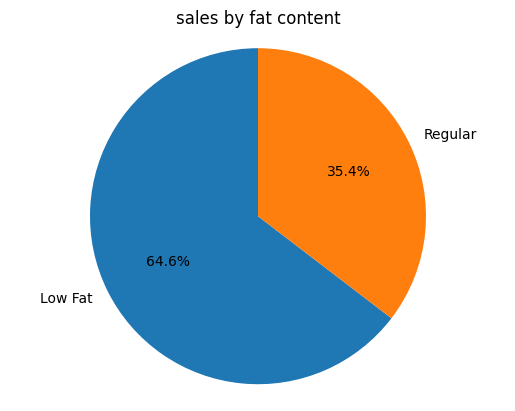

In [45]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title('sales by fat content')
plt.axis('equal')
plt.show()


**##tatal sales by item type**

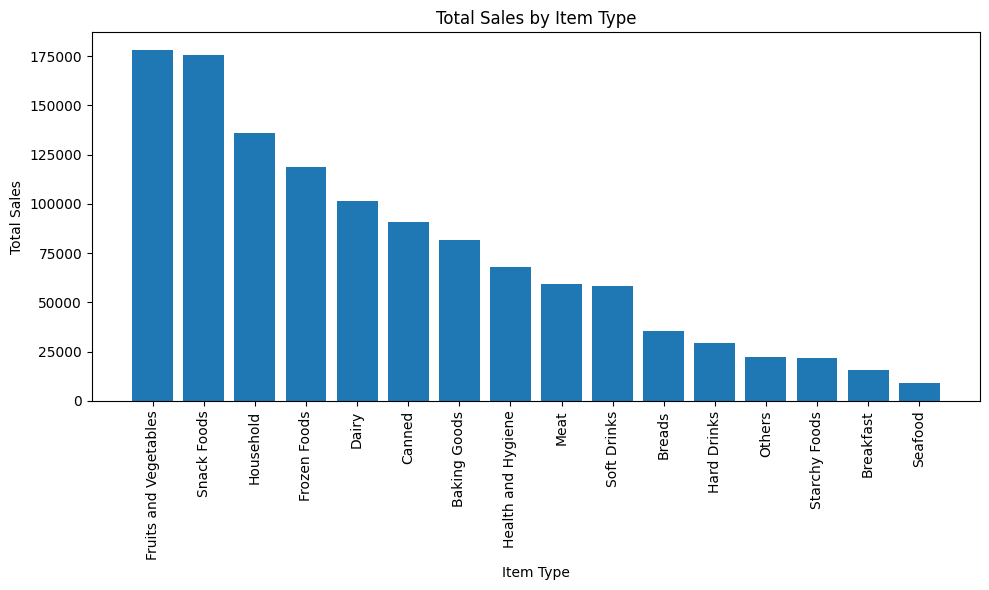

In [49]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.tight_layout()
plt.show()

**##fat content by outlet by total sales**

In [51]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

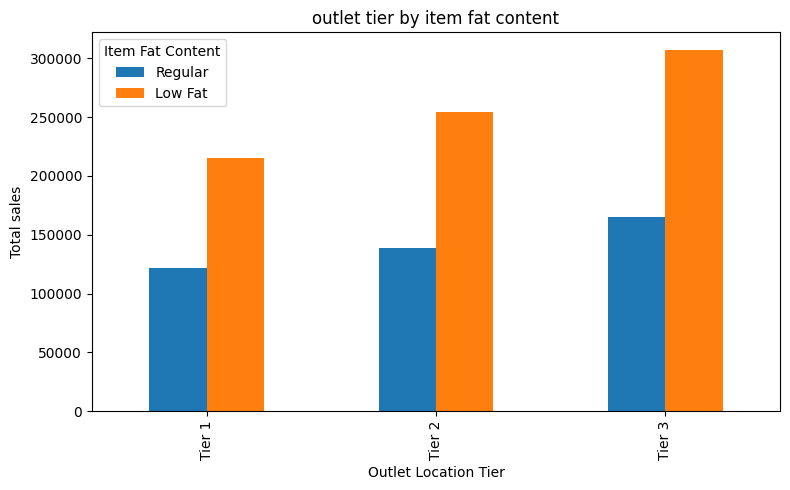

In [57]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar',figsize=(8,5),title="outlet tier by item fat content")
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


##**total sales by outlest establishment**

In [58]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

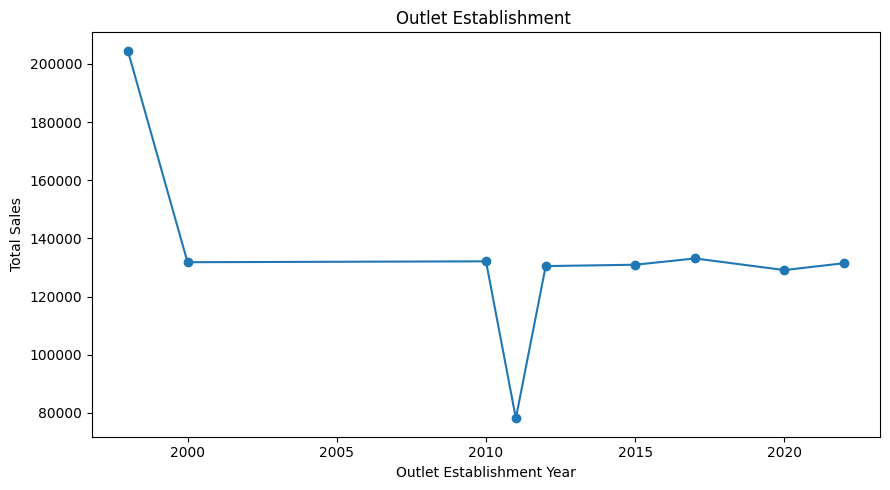

In [59]:
sales_by_year=df.groupby(['Outlet Establishment Year'])['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title("Outlet Establishment ")
plt.tight_layout()
plt.show()

##**5. Sales by Outlet Size:**

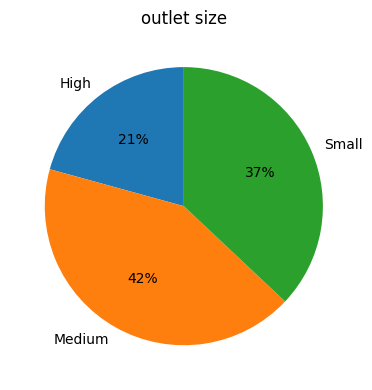

In [62]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.0f%%',startangle=90)
plt.title('outlet size')
plt.tight_layout()
plt.show()

#** Sales by Outlet Location**

In [63]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

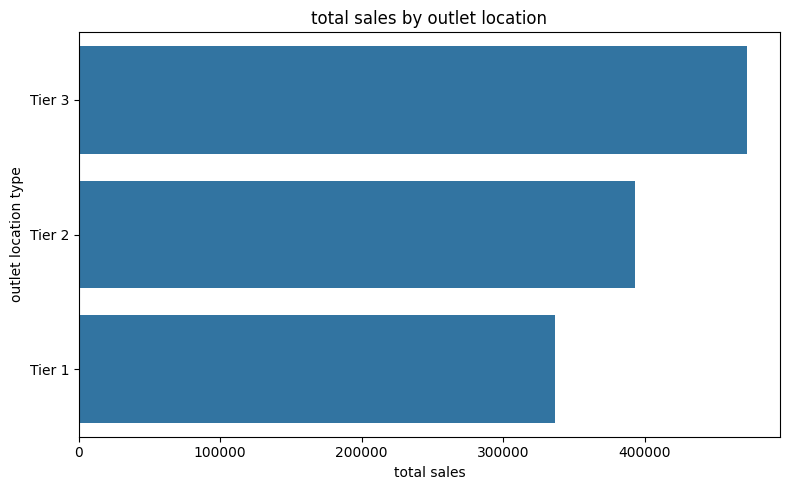

In [67]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)
plt.title('total sales by outlet location')
plt.xlabel('total sales')
plt.ylabel("outlet location type")
plt.tight_layout()
plt.show()
